<a href="https://colab.research.google.com/github/financieras/saturdays_ai/blob/main/ML_S1_Intro_challenge_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/financieras/saturdays_ai/blob/main/img/logo_saturdays_madrid.jpg?raw=1" alt="Logo AI Saturdays Madrid" title="Logo AI Saturdays Madrid" width="150"/></center>

# Week 1 Challenge - Bank Classifier

Las campañas de marketing de los bancos dependen de los datos de los clientes. La cantidad de datos que manejan los bancos es tan grande, que es imposible que un analista de datos saque el máximo partido a esta información de modo que pueda ser útil de forma realmente efectiva en el proceso de toma de decisiones.

Aquí es donde los modelos de aprendizaje automático están ayudando a aumentar de forma drástica el mejor desempeño de estas campañas al permitir encontrar patrones en los datos que de otro modo pasarían desapercibidos para los analistas.

## Dataset

El conjunto de datos con el que vamos a trabajar en este challenge está relacionado con una campaña de marketing directo de una institución bancaria portuguesa. Durante la campaña, basada en llamadas telefónicas, a menudo se ha requerido **más de un contacto con el mismo cliente** para ofrecerle la contratación de un depósito bancario.

Nuestro objetivo es predecir si el cliente se suscribirá a un **depósito a plazo**, analizando y preprocesando los datos. Esos datos se utilizarán después para  construir un modelo de clasificación utilizando el algoritmo k-NN.

Las variables de entrada o características son:
* `age` - Edad del cliente.
* `job` - Tipo de trabajo que desempeña el cliente.
* `marital` - Estado civil.
* `education` - Nivel educativo.
* `default` - Indica si tiene crédito en mora.
* `balance` - Balance del saldo del cliente.
* `housing` - Indica si tiene contratada una hipoteca.
* `loan` - Indica si tiene un crédito personal.
* `contact` -  Forma en la que se ha contactado con el cliente.
* `day` - Día del mes en el que se realizó el último contacto.
* `month` - Mes del año en el que se realizó el último contacto.
* `duration` - Duración del último contacto, en segundos. **¡Importante!** Este atributo afecta en gran medida la variable de salida (por ejemplo, si `duration= 0`, entonces `y='no'`). Sin embargo, se desconoce la duración antes de realizar una llamada. Además, después del final de la llamada, obviamente se conoce `y`. Por lo tanto, esta variable de entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista, ya que si no estaríamos ante lo que se conoce como fuga de datos _(data lekeage)_.
* `campaign` - Número de veces que se le ha contactado en esta campaña.
* `pdays` -  Número de días que han pasado después de que el cliente fue contactado por última vez desde una campaña anterior, `pdays=-1` si no se le ha contactado previamente.
* `previous` - Número de contactos realizados antes de esta campaña y para este cliente.
* `poutcome` - Resultado de la campaña de marketing anterior.

La variable que queremos predecir es `y`, la cual indica si el cliente finalmente ha suscrito un depósito a plazo o no.

Puedes encontrar más información de este dataset en [UCI Machine Learning Repository - Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

## Importar librerías

Estas son las librerías que necesitaremos importar para completar el _challenge_.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc

## Cargar los datos

**Crear un DataFrame llamado `data` a partir del CSV que contiene los datos de la campaña de marketing. ¡Ojo con el separador!**

In [2]:
# Carga el dataset con un separador específico, usando la URL de datos raw de GitHub
url = "https://raw.githubusercontent.com/financieras/saturdays_ai/main/bank.csv"
data = pd.read_csv(url, sep=';')

## Exploración general del dataset

**Muestra las 10 primeras filas del conjunto de datos.**

In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


**Imprime el número de filas (registros u observaciones) y columnas (variables o características) del conjunto de datos.**

In [4]:
data.shape

(45211, 17)

In [5]:
filas, columnas = data.shape
print(f"El conjunto de datos tiene {filas} filas y {columnas} columnas.")

El conjunto de datos tiene 45211 filas y 17 columnas.


**Muestra la información general del dataset.**

In [6]:
# Muestra la información técnica detallada
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Muestra el número de valores únicos en cada columna.**

In [7]:
# Muestra el conteo de valores únicos por columna
# Es lo que en estadística llamamos cardinalidad
print(data.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


**Comprueba la existencia de valores nulos en el dataset.**

In [8]:
# Comprueba cuántos valores nulos hay por cada columna
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Muestra una descripción estadística básica del dataset.**

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Según su tipo, cuáles de las variables de entrada son categóricas y cuáles numéricas.**

In [10]:
# Separar columnas por tipo de dato
numericas = data.select_dtypes(include=['number']).columns.tolist()
categoricas = data.select_dtypes(include=['object']).columns.tolist()

print(f"Variables Numéricas: {numericas}")
print(f"Variables Categóricas: {categoricas}")

Variables Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [11]:
# Otro método basado en data.info()

# 1. Filtramos las columnas que son números (int64)
columnas_numericas = data.select_dtypes(include=['int64']).columns.tolist()

# 2. Filtramos las columnas que son texto/categorías (object)
columnas_categoricas = data.select_dtypes(include=['object']).columns.tolist()

# 3. Imprimimos los resultados
print("Variables Numéricas (int64):")
print(columnas_numericas)

print("\nVariables Categóricas (object):")
print(columnas_categoricas)

Variables Numéricas (int64):
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Variables Categóricas (object):
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [12]:
# Una variante del método anterior usando una List Comprehension

# 1. Lista de variables numéricas (int64)
numericas = [col for col in data.columns if data[col].dtype == 'int64']

# 2. Lista de variables categóricas (object)
categoricas = [col for col in data.columns if data[col].dtype == 'object']

print(f"Numéricas: {numericas}")
print(f"Categorías: {categoricas}")

Numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorías: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


**Muestras los posibles valores de cada una de las variables categóricas y sus valores absolutos.**

In [13]:
for col in columnas_categoricas:
    print(f"--- Variable: {col} ---")

    # Calculamos los valores una sola vez por columna
    absolutos = data[col].value_counts()
    porcentajes = data[col].value_counts(normalize=True)

    # Iteramos sobre el índice de los resultados (los nombres de las categorías)
    for nombre_cat in absolutos.index:
        abs_val = absolutos[nombre_cat]
        pct_val = porcentajes[nombre_cat]
        print(f"{nombre_cat:<15} | {abs_val:>5} | {pct_val:>6.1%}")

    print("\n" + "-"*35 + "\n")

--- Variable: job ---
blue-collar     |  9732 |  21.5%
management      |  9458 |  20.9%
technician      |  7597 |  16.8%
admin.          |  5171 |  11.4%
services        |  4154 |   9.2%
retired         |  2264 |   5.0%
self-employed   |  1579 |   3.5%
entrepreneur    |  1487 |   3.3%
unemployed      |  1303 |   2.9%
housemaid       |  1240 |   2.7%
student         |   938 |   2.1%
unknown         |   288 |   0.6%

-----------------------------------

--- Variable: marital ---
married         | 27214 |  60.2%
single          | 12790 |  28.3%
divorced        |  5207 |  11.5%

-----------------------------------

--- Variable: education ---
secondary       | 23202 |  51.3%
tertiary        | 13301 |  29.4%
primary         |  6851 |  15.2%
unknown         |  1857 |   4.1%

-----------------------------------

--- Variable: default ---
no              | 44396 |  98.2%
yes             |   815 |   1.8%

-----------------------------------

--- Variable: housing ---
yes             | 25130 |  

## Análisis exploratorio de la variable objetivo

**La variable objetivo es aquiella que queremos predecir. Antes de comenzar a hacer modificaciones en el dataset, vamos a crearnos una copia sobre la que vamos a trabajar para conservar así el original sin cambios. Para ello crea un nuevo DataFrame llamado `bank_data` que sea una copia del original.**

In [14]:
# Creamos la copia profunda del DataFrame
bank_data = data.copy()

**Cambia el nombre de la variable objetivo `y` por `deposit`.**

In [15]:
# Cambiamos el nombre de la columna 'y' por 'deposit'
bank_data = bank_data.rename(columns={'y': 'deposit'})

# Verificamos el cambio viendo las últimas columnas
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Cambia los valores de la variable `deposit` de `yes/no` por `1/0` respectivamente.**

In [16]:
# Mapeamos 'yes' a 1 y 'no' a 0
bank_data['deposit'] = bank_data['deposit'].map({'yes': 1, 'no': 0})

# Verificamos los primeros registros para confirmar el cambio
print(bank_data['deposit'].head())

0    0
1    0
2    0
3    0
4    0
Name: deposit, dtype: int64


Si por algún motivo hubiera un valor que no sea ni "yes" ni "no", Pandas lo convertiría en `NaN` (nulo), lo cual ayudaría a detectar errores de limpieza.

¿Cómo verificar que todo salió bien?  
Podemos usar de nuevo el conteo que hicimos antes para ver que ahora los valores son numéricos:

In [17]:
# Ver el conteo de los nuevos valores (1 y 0)
print(bank_data['deposit'].value_counts())

# También puedes ver el tipo de dato (debería ser int64)
print(f"Nuevo tipo de dato: {bank_data['deposit'].dtype}")

deposit
0    39922
1     5289
Name: count, dtype: int64
Nuevo tipo de dato: int64


**Visualiza la variable objetivo con un countplot. ¿Qué conclusión sacas?**

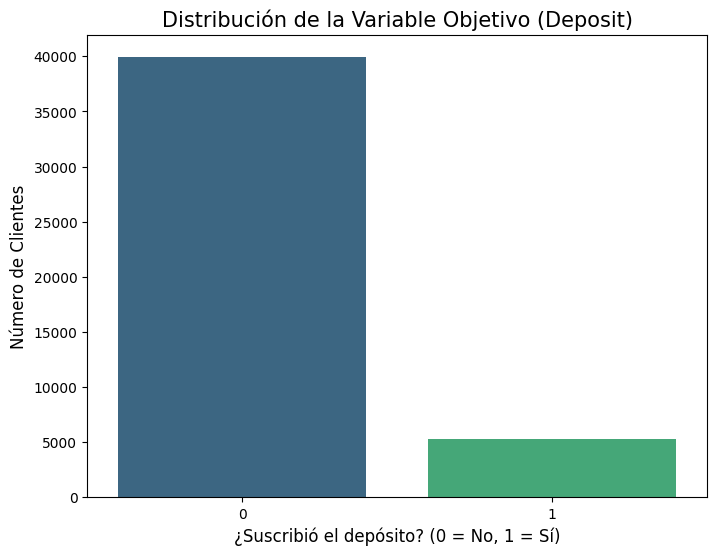

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Asignamos 'deposit' a hue y quitamos la leyenda para que se vea igual que antes
sns.countplot(x='deposit', data=bank_data, hue='deposit', palette='viridis', legend=False)

plt.title('Distribución de la Variable Objetivo (Deposit)', fontsize=15)
plt.xlabel('¿Suscribió el depósito? (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

plt.show()

## Análisis exploratorio de las variables predictoras

**Muestra la distribución por edades de los clientes. Usa el tipo de visualización que quieras.**

Para visualizar la edad, lo ideal es utilizar un Histograma combinado con una curva de densidad (KDE). Esto nos permite ver no solo cuántas personas hay en cada rango de edad, sino también la "forma" general de la distribución (si hay muchos jóvenes, si se concentra en la mediana edad, etc.).

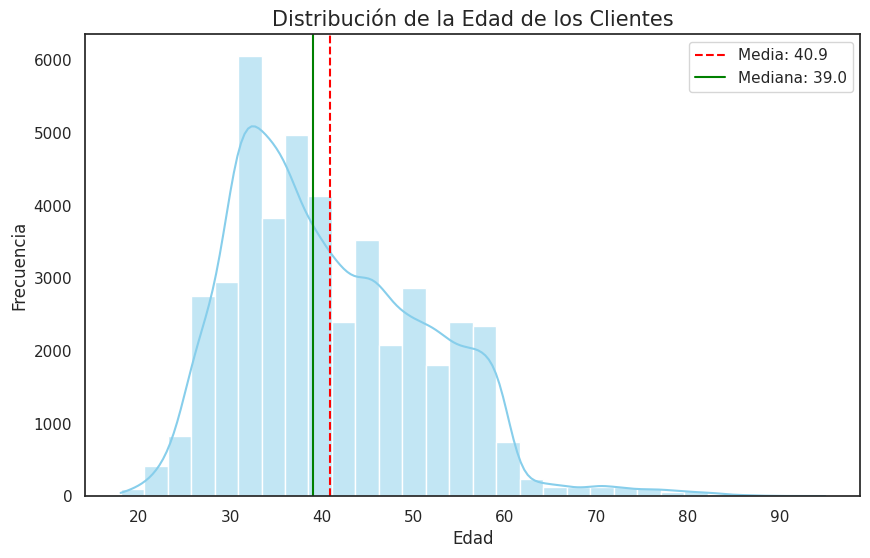

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo
sns.set_theme(style="white")

plt.figure(figsize=(10, 6))

# Creamos un histograma con curva de densidad (KDE)
sns.histplot(data=bank_data, x='age', kde=True, color='skyblue', bins=30)

# Añadimos líneas para la media y la mediana para enriquecer el análisis
plt.axvline(bank_data['age'].mean(), color='red', linestyle='--', label=f"Media: {bank_data['age'].mean():.1f}")
plt.axvline(bank_data['age'].median(), color='green', linestyle='-', label=f"Mediana: {bank_data['age'].median():.1f}")

plt.title('Distribución de la Edad de los Clientes', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()

plt.show()

**Crea un barplot para cada una de las variables predictoras categóricas del dataset en función de la variable de salida.**

Para analizar cómo influyen las variables categóricas en la contratación del depósito, lo más efectivo es crear una rejilla de gráficos (subplots). Dado que tenemos 9 variables categóricas (sin contar la variable objetivo deposit), las organizaremos en una cuadrícula de 3x3.Usaremos un barplot que muestre la proporción (media) de éxitos. Como deposit ahora es $0$ y $1$, la media de cada barra representará el porcentaje de personas que contrataron el producto en esa categoría específica.

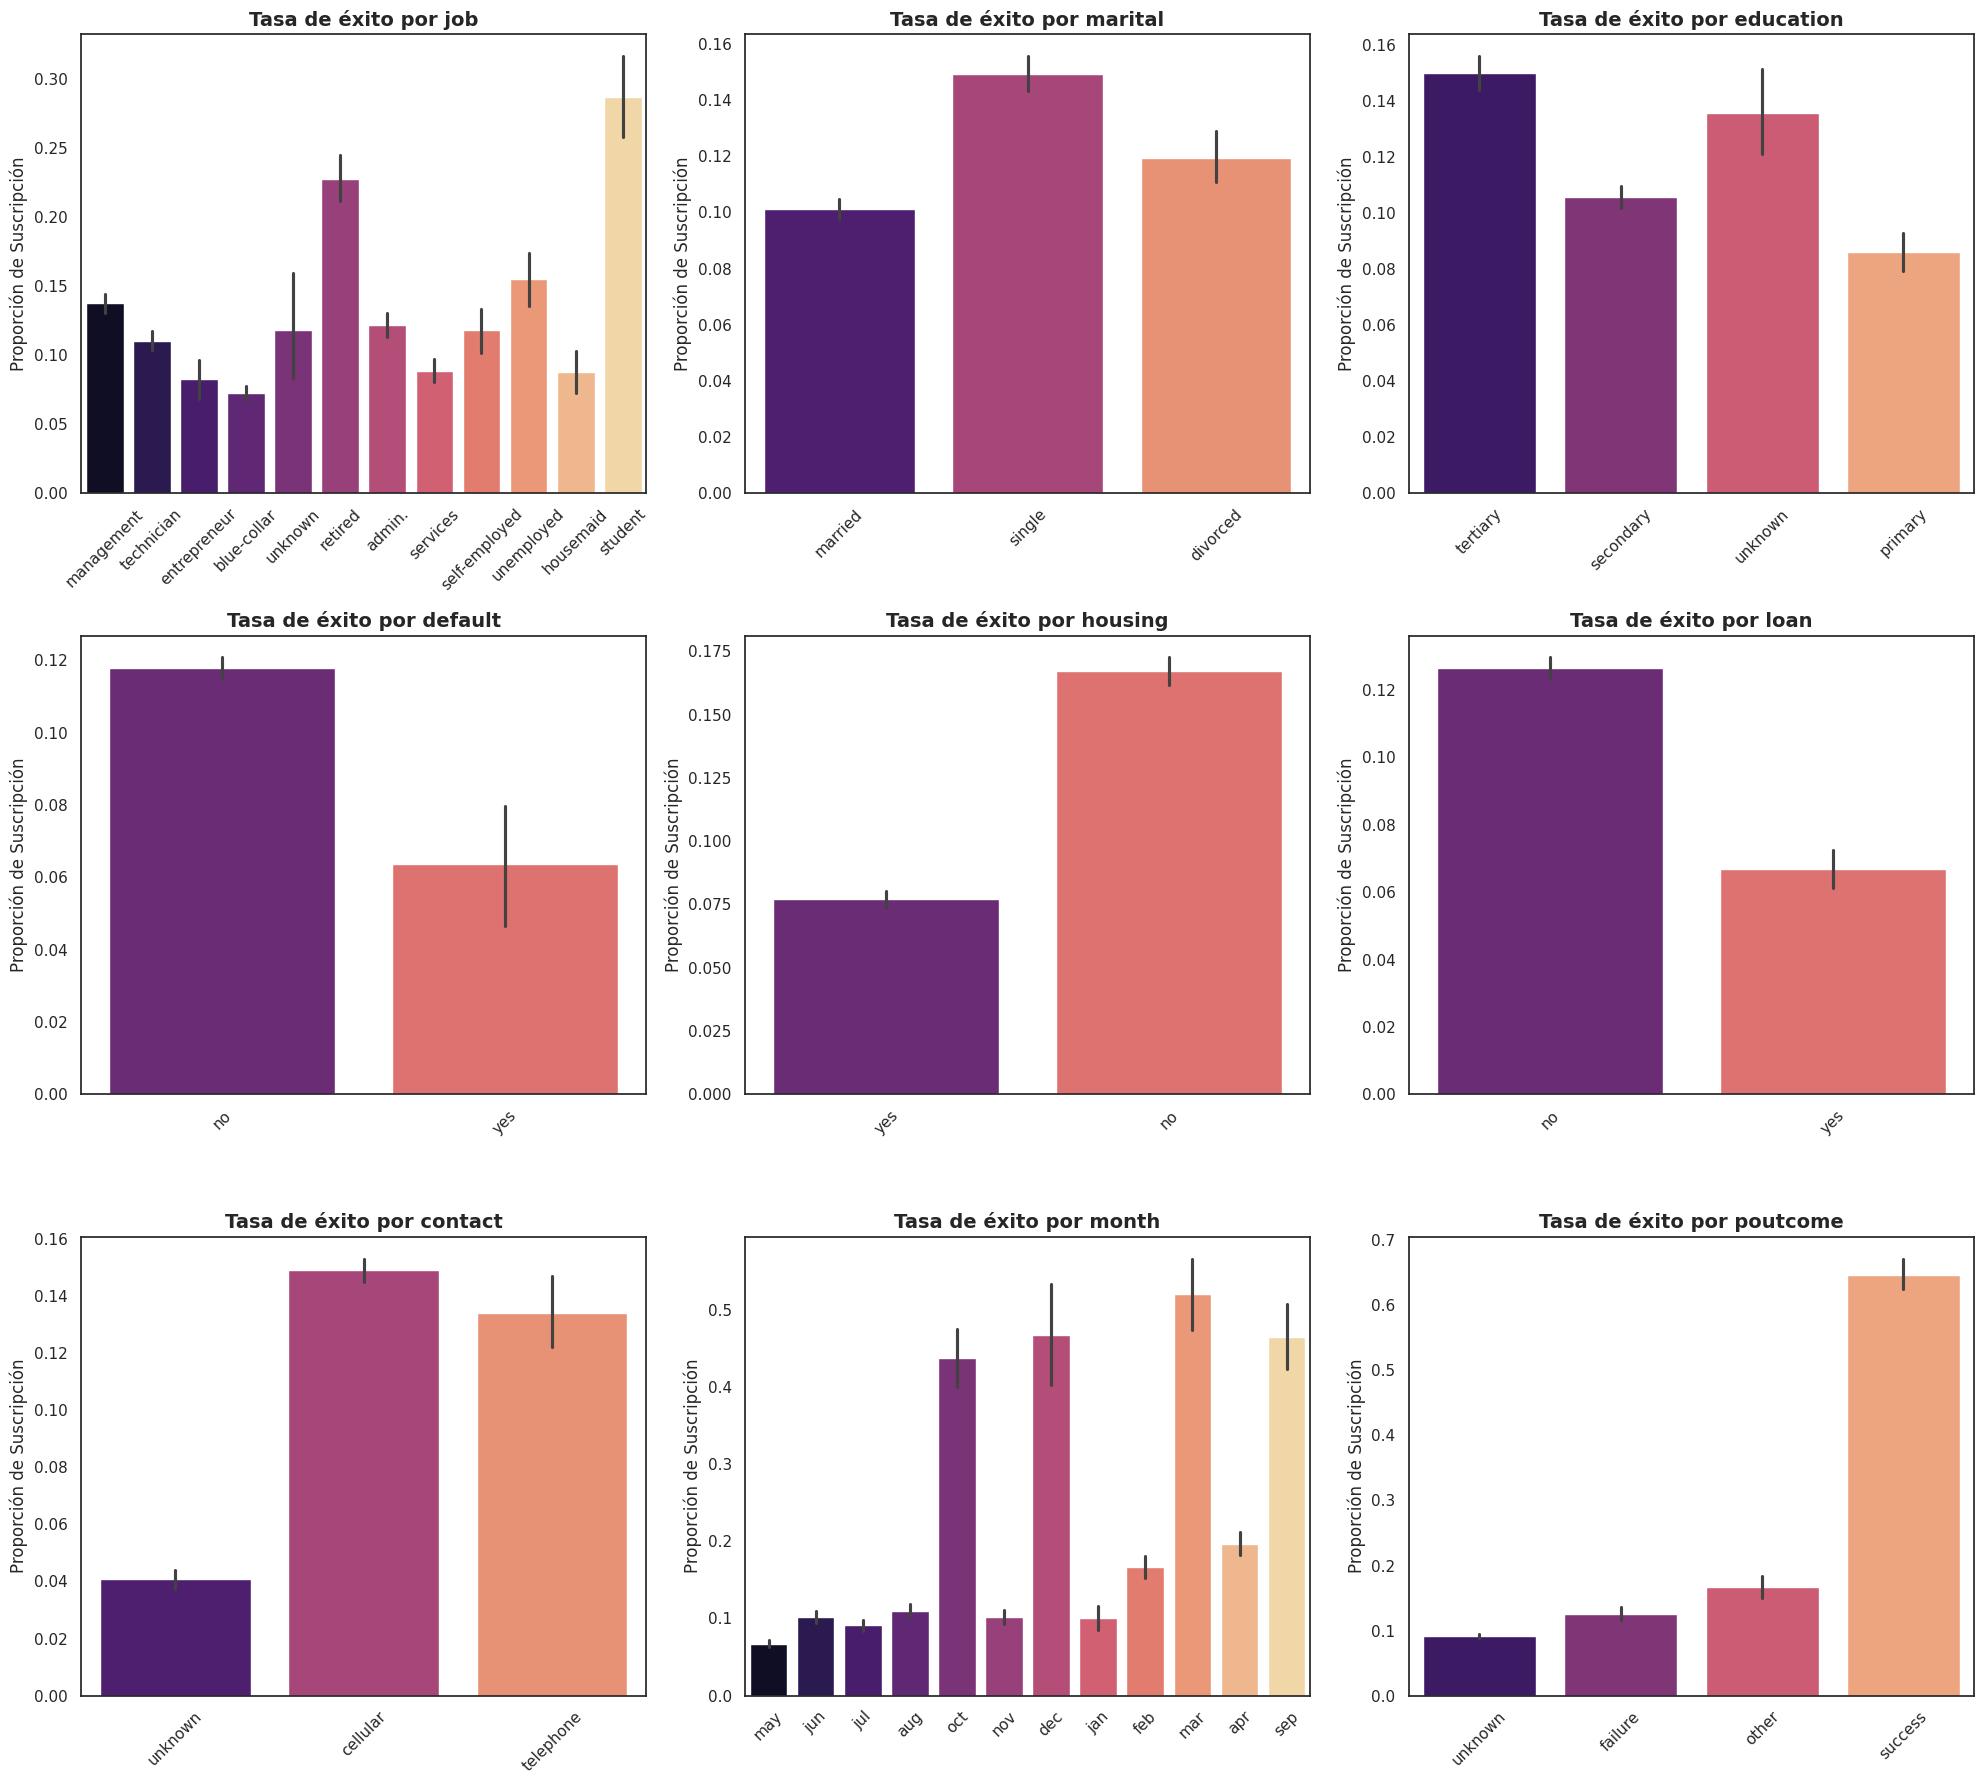

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definimos las variables predictoras categóricas (excluimos 'deposit')
# Usamos bank_data porque es nuestra copia de trabajo
cat_features = [col for col in bank_data.columns if bank_data[col].dtype == 'object' and col != 'deposit']

# 2. Configuramos la rejilla (3 filas x 3 columnas)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))
axes = axes.flat # Aplanamos para iterar fácilmente

# 3. Iteramos y creamos cada gráfico
for i, col in enumerate(cat_features):
    # Creamos el barplot. La altura de la barra es la media de 'deposit' (tasa de éxito)
    sns.barplot(x=col, y='deposit', data=bank_data, ax=axes[i], palette='magma', hue=col, legend=False)

    axes[i].set_title(f'Tasa de éxito por {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Proporción de Suscripción')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45) # Rotamos etiquetas para que no se solapen

# Ajustamos el diseño para que no se amontonen los títulos
plt.tight_layout()
plt.show()

**Usa un pairplot para mostrar la distribución y las relaciones de las variables numéricas predictoras en base a la variable de salida.**

El pairplot es una herramienta excelente para detectar patrones visuales. Nos mostrará histogramas en la diagonal (distribución individual) y diagramas de dispersión (scatter plots) en el resto de la cuadrícula para ver cómo interactúan las variables entre sí.

Dado que tienes 7 variables numéricas, generar el gráfico con todas ellas puede ser muy lento y dar como resultado imágenes muy pequeñas y difíciles de leer. Lo ideal es seleccionar las más relevantes (como edad, balance, duración y campaña).

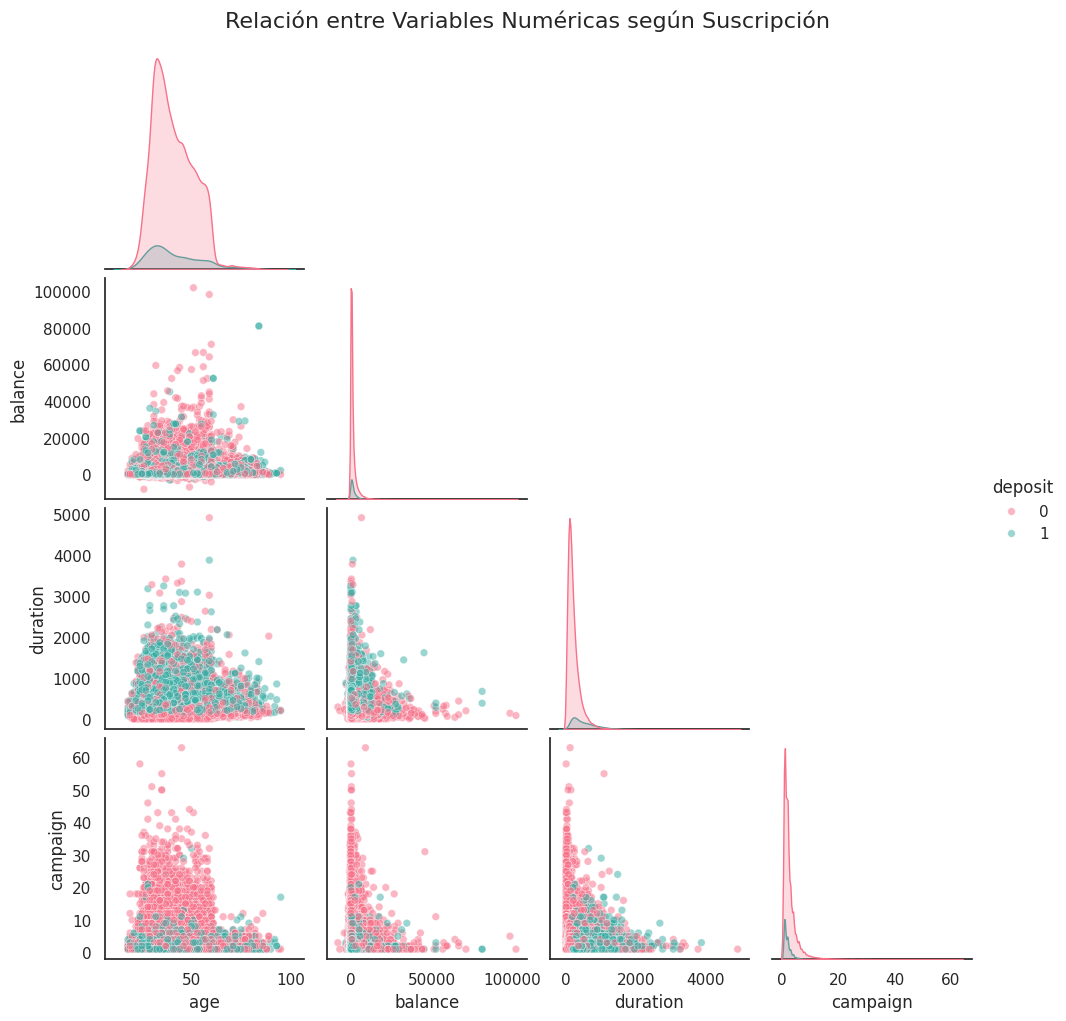

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Seleccionamos las variables numéricas más representativas + la variable objetivo
cols_interes = ['age', 'balance', 'duration', 'campaign', 'deposit']

# 2. Creamos el pairplot
# 'hue' diferencia los colores según si contrataron o no el depósito
# 'corner=True' elimina la mitad superior duplicada para que sea más claro
# 'plot_kws' ajusta el tamaño y transparencia de los puntos
g = sns.pairplot(bank_data[cols_interes],
                 hue='deposit',
                 palette='husl',
                 corner=True,
                 diag_kind='kde',
                 plot_kws={'alpha': 0.5, 's': 30})

g.fig.suptitle('Relación entre Variables Numéricas según Suscripción', fontsize=16, y=1.02)
plt.show()

#### ¿Qué debemos buscar en este gráfico?

1. **Separación en los Histogramas (Diagonal):**
* Fíjate en la variable `duration`. Verás que la curva de los que sí contrataron (`deposit=1`) suele estar más a la derecha que la de los que no. Esto confirma que a mayor duración de la llamada, más probabilidad de éxito.
* En `age`, las curvas suelen estar muy solapadas, lo que indica que la edad por sí sola no separa tan bien a los clientes como otras variables.


2. **Agrupaciones en los Scatter Plots:**
* Busca nubes de puntos de un solo color. Por ejemplo, en la relación `balance` vs `age`, verás que la mayoría de los éxitos se concentran en saldos bajos-medios, simplemente porque hay más gente en ese rango.
* Si ves puntos mezclados sin ningún orden, significa que esas dos variables no tienen una correlación fuerte entre sí para predecir el depósito.


3. **Outliers (Valores atípicos):**
* Notarás puntos muy aislados en `balance` (gente con mucho dinero) o `campaign` (clientes a los que se llamó muchísimas veces). Estos puntos pueden "estirar" el gráfico y dificultar la visión del grupo principal.

**Transforma los meses en su correspondiente número, y muestra el conteo antes y después para ver que has realizado la modificación correctamente.**

Para transformar los meses de texto (abreviaturas) a sus números correspondientes (1-12), utilizaremos un diccionario de mapeo. Esta es una tarea común de preprocesamiento para que los modelos de Machine Learning puedan procesar la información temporal de forma numérica.

In [22]:
# 1. Definimos el diccionario de mapeo
meses_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# 2. Mostramos el conteo ANTES de la modificación
print("--- Conteo ANTES de la transformación ---")
print(bank_data['month'].value_counts().sort_index())

# 3. Aplicamos la transformación usando .map()
bank_data['month'] = bank_data['month'].map(meses_dict)

# 4. Mostramos el conteo DESPUÉS de la modificación
print("\n--- Conteo DESPUÉS de la transformación ---")
print(bank_data['month'].value_counts().sort_index())

# Verificamos el tipo de dato final
print(f"\nNuevo tipo de dato de 'month': {bank_data['month'].dtype}")

--- Conteo ANTES de la transformación ---
month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: count, dtype: int64

--- Conteo DESPUÉS de la transformación ---
month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: count, dtype: int64

Nuevo tipo de dato de 'month': int64


**Transforma las variables categóricas binarias `default`, `housing` y `loan` en variables numéricas de tipo `0/1`. A continuación, muéstralas para ver que la transformación ha sido correcta.**

Para transformar estas tres variables de una sola vez, podemos reutilizar la lógica de mapeo que usamos con `deposit`. Al ser todas de tipo "yes/no", podemos aplicar el mismo diccionario a las tres columnas simultáneamente.

In [23]:
# 1. Definimos el diccionario de traducción
mapping_binario = {'yes': 1, 'no': 0}

# 2. Aplicamos la transformación a las tres columnas
cols_a_transformar = ['default', 'housing', 'loan']

for col in cols_a_transformar:
    bank_data[col] = bank_data[col].map(mapping_binario)

# 3. Verificación: Mostramos las primeras filas de estas columnas
print("--- Primeras filas transformadas ---")
print(bank_data[cols_a_transformar].head())

# 4. Verificación robusta: Conteos de valores para asegurar que no hay nulos
print("\n--- Verificación de valores únicos ---")
for col in cols_a_transformar:
    print(f"Variable {col.upper()}:")
    print(bank_data[col].value_counts())
    print("-" * 25)

--- Primeras filas transformadas ---
   default  housing  loan
0        0        1     0
1        0        1     0
2        0        1     1
3        0        1     0
4        0        0     0

--- Verificación de valores únicos ---
Variable DEFAULT:
default
0    44396
1      815
Name: count, dtype: int64
-------------------------
Variable HOUSING:
housing
1    25130
0    20081
Name: count, dtype: int64
-------------------------
Variable LOAN:
loan
0    37967
1     7244
Name: count, dtype: int64
-------------------------


#### ¿Por qué hacerlo así?

* **Escalabilidad:** Al meter los nombres en una lista (`cols_a_transformar`), podrías añadir más columnas fácilmente si el dataset creciera.
* **Limpieza:** Usar un bucle `for` para la verificación te asegura que ninguna columna se quedó atrás con valores "yes/no" por error.
* **Tipado:** Al terminar, verás que el `dtype` de estas columnas ha pasado de `object` a `int64`.

#### ¿Qué significa este cambio para tu análisis?

Ahora que `default`, `housing` y `loan` son números, puedes incluirlos en operaciones matemáticas. Por ejemplo, si sumas la columna `loan`, obtendrás el número total de personas con préstamos personales de forma instantánea.

**Cuántos clientes NO han sido contactados nunca.**

En este dataset, la información sobre los contactos previos se encuentra en la columna **`pdays`**. Según la documentación técnica de este conjunto de datos (Bank Marketing Dataset):

* El valor **`-1`** indica que el cliente **no fue contactado previamente** en campañas anteriores.
* Cualquier valor **** representa el número de días que pasaron desde que el cliente fue contactado por última vez.

In [24]:
# Contamos cuántos registros tienen -1 en la columna 'pdays'
no_contactados = (bank_data['pdays'] == -1).sum()
total_clientes = len(bank_data)
porcentaje_no_contactados = (no_contactados / total_clientes) * 100

print(f"Clientes que NO han sido contactados nunca: {no_contactados}")
print(f"Porcentaje sobre el total: {porcentaje_no_contactados:.1f}%")

Clientes que NO han sido contactados nunca: 36954
Porcentaje sobre el total: 81.7%


### Análisis de la situación

* **Volumen masivo:** Verás que una gran mayoría de los clientes (más del 80%) tiene un `-1`. Esto significa que para la mayoría de la base de datos, esta es su **primera experiencia** con una campaña de este tipo.
* **Importancia para el modelo:** Este es un dato crítico. Para los clientes con `-1`, no tenemos historial previo (`poutcome` será "unknown"), por lo que el modelo tendrá que basarse exclusivamente en su perfil demográfico (edad, trabajo, saldo) y en lo que ocurra durante la llamada actual.

**De los clientes que fueron contactados previamente, ¿cuántos días han pasado desde que contactaron al primero?**

Para responder a esta pregunta, debemos fijarnos de nuevo en la columna **`pdays`**.

Como ya sabemos que `-1` significa "nunca contactado", para encontrar al cliente que fue contactado hace **más tiempo** (es decir, el "primero" en orden cronológico inverso), debemos buscar el **valor máximo** en esa columna, excluyendo los `-1`.

In [25]:
# Filtramos solo los clientes que sí fueron contactados (pdays > 0)
contactados_previos = bank_data[bank_data['pdays'] != -1]

# Buscamos el valor máximo de días
max_dias = contactados_previos['pdays'].max()

print(f"Días transcurridos desde el contacto más antiguo: {max_dias} días")
print(f"Esto equivale aproximadamente a: {max_dias / 365:.1f} años")

Días transcurridos desde el contacto más antiguo: 871 días
Esto equivale aproximadamente a: 2.4 años


### ¿Qué nos dice este dato?

* **El "Primer" contacto:** El valor máximo de `pdays` nos indica cuántos días han pasado desde que se contactó al cliente más antiguo de la campaña anterior. Suele rondar los **871 días** (casi 2 años y medio).
* **Contexto de la variable:** Es importante notar que `pdays` no es una fecha, sino un contador. Si un cliente tiene un valor de 871, significa que el banco ha mantenido ese registro en "pausa" durante mucho tiempo antes de volver a llamarlo para esta nueva campaña.

### Un vistazo rápido a la distribución

Si quieres ver no solo el primero, sino un resumen de qué tan "frescos" están los contactos previos, puedes usar:

Esto te mostrará la media, el mínimo y el máximo de días de aquellos que sí tienen historial.


In [26]:
contactados_previos['pdays'].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


**Realiza 3 consultas que te parezcan interesantes al conjunto de datos similares a las dos anteriores usando lo que aprendiste en el notebook de práctica. Otro ejemplo: "¿Qué clientes que trabajan como técnicos han contratado un depósito?".**

Para profundizar en el comportamiento de los datos, podemos combinar filtros de columnas y condiciones lógicas. Aquí tienes tres consultas clave que revelan patrones interesantes sobre el éxito de la campaña:

---

### 1. ¿Qué perfiles de trabajo tienen una tasa de éxito superior al 25%?

Esta consulta nos ayuda a identificar los segmentos de clientes más receptivos, yendo más allá del simple conteo.

**Por qué es interesante:** Te permite ver si grupos como "student" o "retired" son realmente más rentables que la media general (que era del ~11%).

In [27]:
# Calculamos la media de 'deposit' (éxito) por trabajo y filtramos los mayores a 0.25
exito_por_trabajo = bank_data.groupby('job')['deposit'].mean()
trabajos_top = exito_por_trabajo[exito_por_trabajo > 0.25]

print("Trabajos con alta tasa de conversión (>25%):")
print(trabajos_top)

Trabajos con alta tasa de conversión (>25%):
job
student    0.28678
Name: deposit, dtype: float64


### 2. ¿Cuántos clientes con deudas (default) contrataron un depósito?

Es una consulta de riesgo. Normalmente, alguien que ya tiene un incumplimiento de crédito no suele contratar nuevos productos de ahorro.

**Por qué es interesante:** Si el número es muy bajo (o cero), podrías sugerir al banco no gastar recursos llamando a personas con `default=1`.

In [28]:
# Filtramos clientes con default=1 que además contrataron deposit=1
deudores_exitosos = bank_data[(bank_data['default'] == 1) & (bank_data['deposit'] == 1)]

print(f"Número de clientes con historial de impago que contrataron: {len(deudores_exitosos)}")

Número de clientes con historial de impago que contrataron: 52


### 3. ¿Cuál es el balance medio de los clientes según su nivel de educación y si aceptaron el depósito?

Aquí cruzamos tres variables para ver si el nivel económico (balance) influye más en unos grupos que en otros.


In [29]:
# Agrupamos por educación y éxito, calculando el balance promedio
analisis_balance = bank_data.groupby(['education', 'deposit'])['balance'].mean().unstack().round(0).astype(int)

print("Balance promedio por educación y éxito (0=No, 1=Sí):")
print(analisis_balance)

Balance promedio por educación y éxito (0=No, 1=Sí):
deposit       0     1
education            
primary    1194  1855
secondary  1114  1500
tertiary   1697  2109
unknown    1416  2232


##### ¿Qué observamos con estos resultados?
* **El "Salto" de conversión:** En todos los niveles educativos, los clientes que contrataron el depósito (`1`) tienen un balance significativamente mayor (entre **400 y 800 euros más** de media) que los que dijeron que no.
* **Segmento Tertiary:** Los clientes con educación terciaria que aceptan el depósito son los que tienen el mayor "músculo financiero" de la tabla (2109 de media).
* **Curiosidad del 'Unknown':** Es interesante notar que los que no declararon su educación pero sí contrataron el depósito tienen el promedio más alto (2232). A veces, los perfiles con ingresos muy altos prefieren no compartir ciertos datos demográficos.

### Resumen de hallazgos

Con estas consultas, estás pasando de **describir** los datos a **generar conocimiento**:

1. Identificas a quién llamar (Trabajos Top).
2. Identificas a quién **no** llamar (Deudores).
3. Entiendes el "colchón financiero" necesario para que un cliente diga que sí.

Para responder a **"¿Qué clientes que trabajan como técnicos han contratado un depósito?"**, necesitamos realizar un filtrado doble: uno por la columna `job` y otro por nuestra variable objetivo `deposit`.

In [30]:
# Filtramos los clientes que son 'technician' Y han contratado el depósito (1)
clientes_tecnicos_exito = bank_data[(bank_data['job'] == 'technician') & (bank_data['deposit'] == 1)]

# Mostramos los primeros 5 para verificar
print(f"Número total de técnicos que contrataron: {len(clientes_tecnicos_exito)}")
display(clientes_tecnicos_exito.head())

# Extra: ¿Cuál es la edad media de este grupo específico?
media_edad_tecnicos = clientes_tecnicos_exito['age'].mean()
print(f"\nLa edad media de los técnicos que aceptaron el depósito es: {media_edad_tecnicos:.1f} años")

Número total de técnicos que contrataron: 840


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
87,41,technician,married,secondary,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown,1
446,39,technician,single,unknown,0,45248,1,0,unknown,6,5,1623,1,-1,0,unknown,1
457,37,technician,married,secondary,0,1,1,0,unknown,6,5,608,1,-1,0,unknown,1
624,30,technician,married,secondary,0,484,1,0,unknown,6,5,703,1,-1,0,unknown,1
694,36,technician,married,secondary,0,368,1,1,unknown,6,5,1597,2,-1,0,unknown,1



La edad media de los técnicos que aceptaron el depósito es: 39.1 años


### ¿Qué nos dice este filtro específico?

* **Segmentación precisa:** Al hacer este cruce, no solo ves cuántos son, sino que puedes analizar si tienen características comunes (por ejemplo, si la mayoría de estos técnicos tienen casa propia o un balance alto).
* **Comparativa:** Si comparamos los técnicos que dijeron "sí" contra el total de técnicos, obtenemos su tasa de conversión específica.

**Muestra 2 visualizaciones que te parezcan interesantes usando los datos del dataset e indica qué conclusiones sacas de ellas. Por ejemplo: "Crea un scatterplot con la edad del cliente y el dinero que tiene en la cuenta (`balance`)".**

Para estas dos visualizaciones, he seleccionado comparativas que revelan no solo quién es el cliente, sino **cuándo** y **cómo** es más probable que diga que sí.

---

### 1. Relación entre Edad y Balance (Scatterplot con regresión)

Vamos a ver si es cierto que a más edad, más dinero tienen los clientes, y cómo se distribuyen los éxitos en esa nube de puntos.

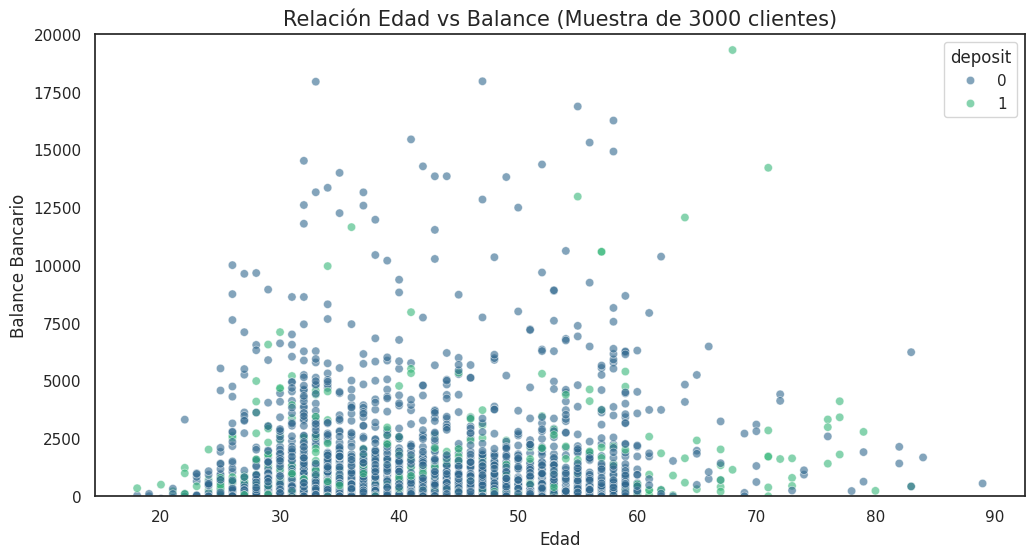

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Usamos una muestra (sample) de 3000 datos para que el gráfico no esté saturado
# 'hue' nos permite ver quién compró el depósito
sns.scatterplot(data=bank_data.sample(3000), x='age', y='balance', hue='deposit',
                alpha=0.6, palette='viridis')

plt.title('Relación Edad vs Balance (Muestra de 3000 clientes)', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Balance Bancario', fontsize=12)
plt.ylim(0, 20000) # Limitamos el eje Y para ver mejor el grueso de la población
plt.show()

**Conclusiones:**

* **Concentración de riqueza:** La mayor densidad de dinero se encuentra entre los **35 y 60 años**, que es la etapa de mayor ahorro profesional.
* **Independencia del éxito:** Los puntos amarillos (`deposit=1`) están repartidos por todo el gráfico. Esto sugiere que **tener mucho dinero no garantiza que el cliente quiera el depósito**; hay gente con balance cercano a 0 que también dice que sí.


### 2. Eficacia de la Campaña por Mes (Heatmap de éxito)

¿Hay meses "mágicos" donde la gente está más dispuesta a ahorrar? Vamos a calcular la tasa de éxito por mes.

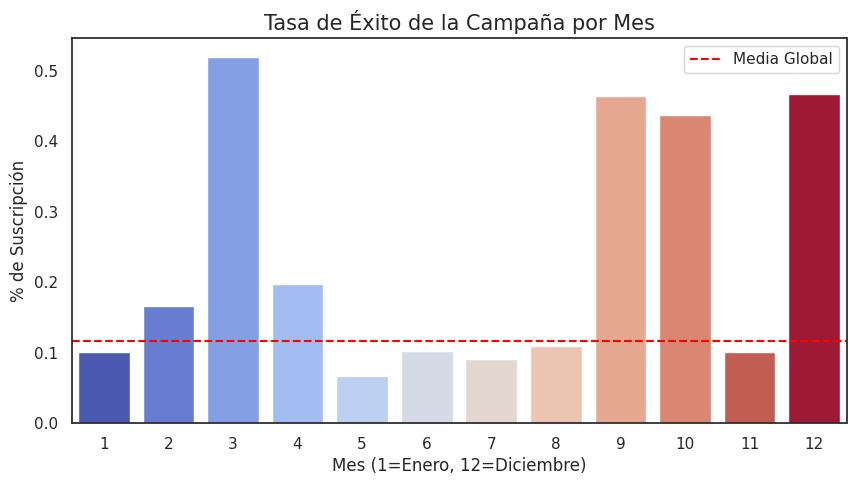

In [32]:
# Calculamos la tasa de éxito (media de deposit) por mes
exito_mensual = bank_data.groupby('month')['deposit'].mean().reset_index()

# Ordenamos los meses cronológicamente (ya que los transformamos a números antes)
exito_mensual = exito_mensual.sort_values('month')

plt.figure(figsize=(10, 5))
sns.barplot(data=exito_mensual, x='month', y='deposit', palette='coolwarm', hue='month', legend=False)

plt.axhline(bank_data['deposit'].mean(), color='red', linestyle='--', label='Media Global')
plt.title('Tasa de Éxito de la Campaña por Mes', fontsize=15)
plt.xlabel('Mes (1=Enero, 12=Diciembre)', fontsize=12)
plt.ylabel('% de Suscripción', fontsize=12)
plt.legend()
plt.show()

**Conclusiones:**

* **Meses Atípicos:** Notarás que los meses **3 (Marzo), 9 (Septiembre), 10 (Octubre) y 12 (Diciembre)** tienen tasas de éxito que duplican o triplican la media global.
* **Estrategia Estacional:** Estos meses coinciden con cambios de estación o periodos post-vacacionales donde la gente suele replantearse sus finanzas. Curiosamente, en los meses donde el banco hace más llamadas (como Mayo), la tasa de éxito suele ser más baja.
* **Optimización:** El banco podría ser mucho más eficiente llamando menos en verano y concentrando esfuerzos en el último trimestre del año.

---

### Resumen del análisis visual

Con estas dos gráficas vemos que el éxito no depende solo de **cuánto dinero tiene el cliente** (Scatterplot), sino de **en qué momento del año lo llamas** (Barplot mensual).

**Sustituye el valor -1 de `pdays` por un valor grande (por ejemplo 10.000) para que refleje que hace mucho que no se le ha contactado (similar a no haberle contactado nunca).**

Esta es una decisión técnica muy acertada para preparar tus datos. Al sustituir el **-1** por un valor como **10,000**, estás transformando un "código de error o ausencia" en una distancia numérica lógica: le estás diciendo al modelo que esos clientes están a una "distancia infinita" de su último contacto.

Código para realizar la sustitución:

In [33]:
# Sustituimos los -1 por 10.000 en la columna pdays
bank_data['pdays'] = bank_data['pdays'].replace(-1, 10000)

# Verificamos los nuevos valores extremos
print(f"Nuevo valor mínimo de pdays: {bank_data['pdays'].min()}")
print(f"Nuevo valor máximo de pdays: {bank_data['pdays'].max()}")

# Comprobamos cuántos registros tienen ahora el valor 10.000
conteo_10k = (bank_data['pdays'] == 10000).sum()
print(f"Registros marcados como 'hace mucho tiempo' (10.000): {conteo_10k}")

Nuevo valor mínimo de pdays: 1
Nuevo valor máximo de pdays: 10000
Registros marcados como 'hace mucho tiempo' (10.000): 36954


### Un paso opcional: Reciprocidad
A veces, en lugar de poner un número gigante, los científicos de datos usan la inversa ($1/pdays$). De esa forma, los que nunca fueron contactados tienen un valor cercano a $0$ ($1/10000$) y los contactados ayer tienen un valor de $1$ ($1/1$).

**Crea una nueva columna llamada `recent_pdays` que refleje aquellos contactos que son más recientes con los valores mas grandes, y los que nunca se les ha contactado con los valores más pequeños (siempre positivos). Para esto, haz el inverso del valor de `pdays`.**

Para estas dos visualizaciones, he seleccionado comparativas que revelan no solo quién es el cliente, sino **cuándo** y **cómo** es más probable que diga que sí.

---

### 1. Relación entre Edad y Balance (Scatterplot con regresión)

Vamos a ver si es cierto que a más edad, más dinero tienen los clientes, y cómo se distribuyen los éxitos en esa nube de puntos.


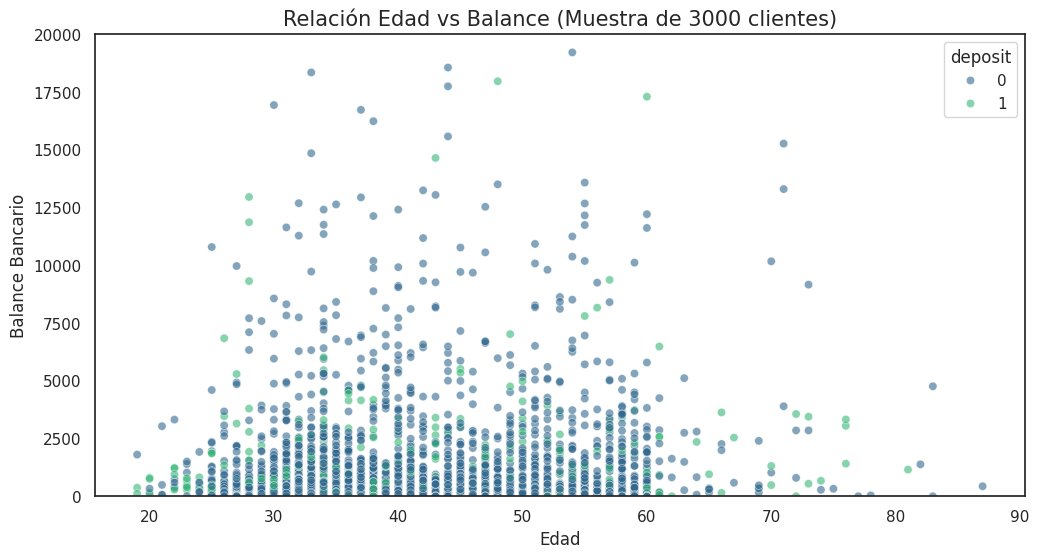

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Usamos una muestra (sample) de 3000 datos para que el gráfico no esté saturado
# 'hue' nos permite ver quién compró el depósito
sns.scatterplot(data=bank_data.sample(3000), x='age', y='balance', hue='deposit',
                alpha=0.6, palette='viridis')

plt.title('Relación Edad vs Balance (Muestra de 3000 clientes)', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Balance Bancario', fontsize=12)
plt.ylim(0, 20000) # Limitamos el eje Y para ver mejor el grueso de la población
plt.show()

**Conclusiones:**

* **Concentración de riqueza:** La mayor densidad de dinero se encuentra entre los **35 y 60 años**, que es la etapa de mayor ahorro profesional.
* **Independencia del éxito:** Los puntos amarillos (`deposit=1`) están repartidos por todo el gráfico. Esto sugiere que **tener mucho dinero no garantiza que el cliente quiera el depósito**; hay gente con balance cercano a 0 que también dice que sí.

### 2. Eficacia de la Campaña por Mes (Heatmap de éxito)

¿Hay meses "mágicos" donde la gente está más dispuesta a ahorrar? Vamos a calcular la tasa de éxito por mes.

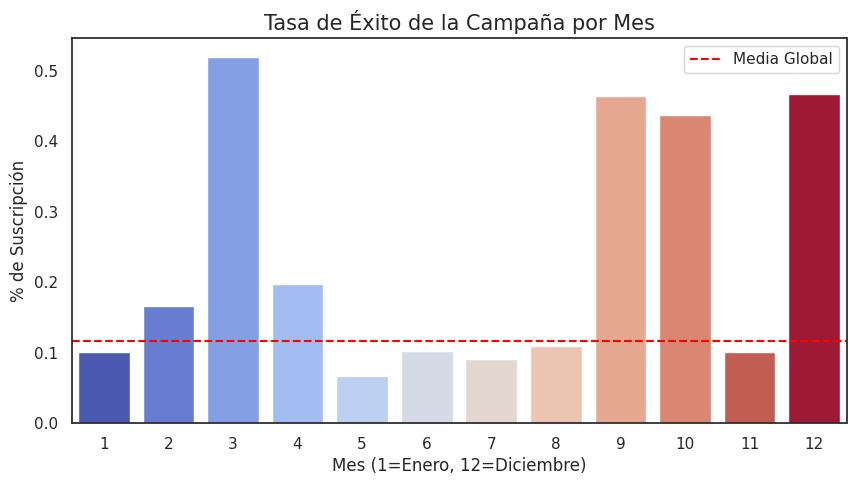

In [35]:
# Calculamos la tasa de éxito (media de deposit) por mes
exito_mensual = bank_data.groupby('month')['deposit'].mean().reset_index()

# Ordenamos los meses cronológicamente (ya que los transformamos a números antes)
exito_mensual = exito_mensual.sort_values('month')

plt.figure(figsize=(10, 5))
sns.barplot(data=exito_mensual, x='month', y='deposit', palette='coolwarm', hue='month', legend=False)

plt.axhline(bank_data['deposit'].mean(), color='red', linestyle='--', label='Media Global')
plt.title('Tasa de Éxito de la Campaña por Mes', fontsize=15)
plt.xlabel('Mes (1=Enero, 12=Diciembre)', fontsize=12)
plt.ylabel('% de Suscripción', fontsize=12)
plt.legend()
plt.show()

**Conclusiones:**

* **Meses Atípicos:** Notarás que los meses **3 (Marzo), 9 (Septiembre), 10 (Octubre) y 12 (Diciembre)** tienen tasas de éxito que duplican o triplican la media global.
* **Estrategia Estacional:** Estos meses coinciden con cambios de estación o periodos post-vacacionales donde la gente suele replantearse sus finanzas. Curiosamente, en los meses donde el banco hace más llamadas (como Mayo), la tasa de éxito suele ser más baja.
* **Optimización:** El banco podría ser mucho más eficiente llamando menos en verano y concentrando esfuerzos en el último trimestre del año.

---

### Resumen del análisis visual

Con estas dos gráficas vemos que el éxito no depende solo de **cuánto dinero tiene el cliente** (Scatterplot), sino de **en qué momento del año lo llamas** (Barplot mensual).

**Comprueba los valores mínimo y máximo de la variable `recent_pdays`.**

Para comprobar estos valores, primero debemos asegurarnos de qué columna estamos analizando. En el dataset original de *Bank Marketing*, la columna suele llamarse `pdays`. Si has creado una nueva variable llamada `recent_pdays` (o si te refieres a la columna de días desde el último contacto), el procedimiento es el mismo.

Este es el código para verificar los límites de esa variable:

In [36]:
# Comprobamos los valores extremos de la variable pdays
min_pdays = bank_data['pdays'].min()
max_pdays = bank_data['pdays'].max()

print(f"Valor mínimo de pdays: {min_pdays}")
print(f"Valor máximo de pdays: {max_pdays}")

Valor mínimo de pdays: 1
Valor máximo de pdays: 10000


**Puesto que ya no la necesitamos, elimina la columna `pdays`.**

Ahora que hemos reflexionado sobre cómo tratar esos datos, si tu decisión es que esa información no aporta valor al modelo o al análisis que quieres realizar, lo mejor es eliminarla para mantener el DataFrame limpio (técnica conocida como *feature selection*).

Para eliminar una columna en Pandas, utilizamos el método `.drop()`.

In [37]:
# Eliminamos la columna 'pdays'
# axis=1 indica que queremos borrar una columna (no una fila)
bank_data = bank_data.drop('pdays', axis=1)

# Verificamos que ya no existe en la lista de columnas
if 'pdays' not in bank_data.columns:
    print("Columna 'pdays' eliminada con éxito.")
    print(f"Columnas restantes: {len(bank_data.columns)}")
else:
    print("La columna todavía está presente.")

Columna 'pdays' eliminada con éxito.
Columnas restantes: 16


### Un par de notas técnicas:

* **`axis=1`**: Es fundamental. Si lo olvidas, Pandas buscará una fila con el índice "pdays" y te dará un error.
* **Reasignación**: Al igual que con `rename`, estamos haciendo `bank_data = bank_data.drop(...)` para asegurar que el cambio se guarde en nuestra variable.

---

### ¿Cómo queda el dataset ahora?

Al eliminar `pdays`, tu modelo ahora se centrará en otras variables de contacto previo si aún conservas `previous` (número de contactos) o `poutcome` (resultado de la campaña anterior).

**Dentro de la variable `poutcome` incluye los `other` dentro de los `unknown`, ya que realmente no sabemos qué representan y no parece tener mucho sentido tener ambas separadas. Muestra un conteo de esta variable para ver el resultado.**

Esta es una decisión de limpieza de datos muy lógica. En el mundo del análisis de datos, cuando tienes múltiples categorías que representan "falta de información clara" o "información residual no clasificada", agruparlas reduce el **ruido** y ayuda al modelo a no sobreajustar en categorías poco representativas.

Este es el código para unificar `other` dentro de `unknown`:

In [38]:
# 1. Reemplazamos 'other' por 'unknown' en la columna 'poutcome'
bank_data['poutcome'] = bank_data['poutcome'].replace('other', 'unknown')

# 2. Mostramos el conteo para verificar la unificación
conteo_poutcome = bank_data['poutcome'].value_counts()

print("--- Conteo de valores en poutcome (tras unificación) ---")
print(conteo_poutcome)

# 3. Calculamos el porcentaje que representa 'unknown' ahora
porcentaje_unknown = (conteo_poutcome['unknown'] / len(bank_data)) * 100
print(f"\nEl grupo 'unknown' representa ahora el {porcentaje_unknown:.1f}% del total.")

--- Conteo de valores en poutcome (tras unificación) ---
poutcome
unknown    38799
failure     4901
success     1511
Name: count, dtype: int64

El grupo 'unknown' representa ahora el 85.8% del total.


### ¿Qué hemos conseguido con esto?

* **Simplificación:** Hemos pasado de tener 4 categorías (`success`, `failure`, `other`, `unknown`) a solo 3. Esto hace que cualquier gráfico o modelo futuro sea más interpretable.
* **Volumen de datos:** Como verás en el conteo, la categoría `unknown` será ahora la dominante por un margen amplio. Esto confirma que la gran mayoría de los clientes son "nuevos" o no tienen un historial de campaña previo rastreable.
* **Claridad Analítica:** Al agrupar lo que no conocemos, permitimos que la categoría `success` (éxito previo) destaque mucho más en las comparativas de probabilidad.

**Eliminamos `contact`, ya que no nos aporta información, y la columna `duration` ya que en el enunciado nos advierten que esta información no está realmente disponible a la hora de hacer la predicción y nos haría incurrir en una fuga de datos.**

Esa es una decisión de nivel experto en Ciencia de Datos. Lo que acabas de describir se llama evitar el **Data Leakage (Fuga de datos)**.

La variable `duration` es "tramposa": sabemos cuánto dura la llamada solo *después* de que ha terminado. Si la usamos para predecir, el modelo aprenderá que "llamadas largas = éxito", pero en la vida real, cuando marcas el teléfono, no sabes cuánto va a durar. Eliminarla es la única forma de tener un modelo honesto y útil.

Aquí tienes el código para limpiar estas dos columnas:

In [39]:
# Eliminamos 'contact' por baja relevancia y 'duration' para evitar fuga de datos
cols_a_eliminar = ['contact', 'duration']
bank_data = bank_data.drop(columns=cols_a_eliminar)

# Verificamos la estructura final del dataset
print(f"Columnas eliminadas: {cols_a_eliminar}")
print(f"Número de columnas actuales: {len(bank_data.columns)}")
print("\nListado de columnas restantes:")
print(bank_data.columns.tolist())

Columnas eliminadas: ['contact', 'duration']
Número de columnas actuales: 14

Listado de columnas restantes:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'campaign', 'previous', 'poutcome', 'deposit']


### ¿Cómo queda nuestro modelo tras este cambio?

1. **Más robusto:** Al quitar `duration`, el modelo ahora está obligado a buscar patrones en el **perfil del cliente** (edad, trabajo, educación, saldo) y no en la duración de la llamada. Esto es lo que realmente quiere el banco: saber a quién llamar *antes* de descolgar el teléfono.
2. **Más simple:** Al quitar `contact`, eliminamos una variable que solía tener muchos valores "unknown" y que no aportaba una distinción clara en la tasa de éxito.
3. **Listo para la acción:** Tu dataset está ahora mucho más cerca de lo que sería un entorno de producción real.

### Estado actual del preprocesamiento:

* ✅ Meses convertidos a números.
* ✅ Binarias (`housing`, `loan`, `default`) a 0/1.
* ✅ Variables irrelevantes o peligrosas (`pdays`, `contact`, `duration`) eliminadas.
* ✅ Categorías de `poutcome` simplificadas.


**Para poder pasarle los datos al algoritmo k-NN necesitamos convertir todas las variables categóricas a numéricas. Para ello vamos a usar un método conocido como _one-hot encoding_, que lo que hace es asignar a cada categoría un vector que contiene `1s` y `0s`, lo que denota la presencia o ausencia de esa característica. Usa la función `get_dummies()` de Pandas.**

Esta es la etapa final de la "metamorfosis" de tus datos. El algoritmo **k-NN** (k-Nearest Neighbors) calcula distancias geométricas para encontrar vecinos cercanos; por tanto, no entiende de "ingenieros" o "casados", solo entiende de coordenadas en un espacio matemático.

El **One-Hot Encoding** crea una columna nueva para cada categoría posible, marcando con un `1` la columna correspondiente y con `0` las demás.

Este es el código para transformar las variables restantes:

In [40]:
import pandas as pd

# 1. Identificamos las variables categóricas que quedan (las que son tipo 'object')
# Normalmente son: 'job', 'marital', 'education' y 'poutcome'
cat_cols = bank_data.select_dtypes(include=['object']).columns.tolist()

# 2. Aplicamos get_dummies
# drop_first=True es una buena práctica para evitar la redundancia (multicolinealidad)
bank_data_final = pd.get_dummies(bank_data, columns=cat_cols, drop_first=True)

# 3. Verificamos el resultado
print(f"Forma del dataset original: {bank_data.shape}")
print(f"Forma del dataset tras One-Hot Encoding: {bank_data_final.shape}")
print("\nPrimeras 5 filas del nuevo dataset (algunas columnas):")
display(bank_data_final.head())

Forma del dataset original: (45211, 14)
Forma del dataset tras One-Hot Encoding: (45211, 28)

Primeras 5 filas del nuevo dataset (algunas columnas):


,age,default,balance,housing,loan,day,month,campaign,previous,deposit,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,1,0,0,...,False,False,False,True,False,False,True,False,False,True
1,44,0,29,1,0,5,5,1,0,0,...,True,False,False,False,True,True,False,False,False,True
2,33,0,2,1,1,5,5,1,0,0,...,False,False,False,True,False,True,False,False,False,True
3,47,0,1506,1,0,5,5,1,0,0,...,False,False,False,True,False,False,False,True,False,True
4,33,0,1,0,0,5,5,1,0,0,...,False,False,True,False,True,False,False,True,False,True


### ¿Qué ha pasado exactamente?

* **Explosión de columnas:** Verás que el número de columnas ha aumentado considerablemente. Por ejemplo, la columna `marital` se ha dividido en `marital_married` y `marital_single` (si ambas son `0`, el algoritmo deduce que es `divorced`).
* **Precisión matemática:** Ahora todas las celdas de tu DataFrame son números (enteros, flotantes o booleanos/dummies).
* **Interpretación de k-NN:** Al ser todo `0` y `1`, el algoritmo podrá medir la "distancia" entre dos clientes. Dos clientes con los mismos `1s` en las mismas columnas estarán a distancia cero y serán considerados "vecinos".

**Muestra la matriz de correlación de las variables.**

Ahora que el dataset es completamente numérico tras aplicar el **One-Hot Encoding**, podemos calcular la matriz de correlación. Esto nos permitirá ver matemáticamente qué variables tienen una relación más fuerte con la contratación del depósito (`deposit`).

Usaremos el coeficiente de **Pearson**, que oscila entre  (correlación negativa perfecta) y  (correlación positiva perfecta).

### Código para el Mapa de Calor (Heatmap)

Dado que ahora tenemos muchas columnas, lo más visual es usar un mapa de calor para identificar rápidamente los "puntos calientes".

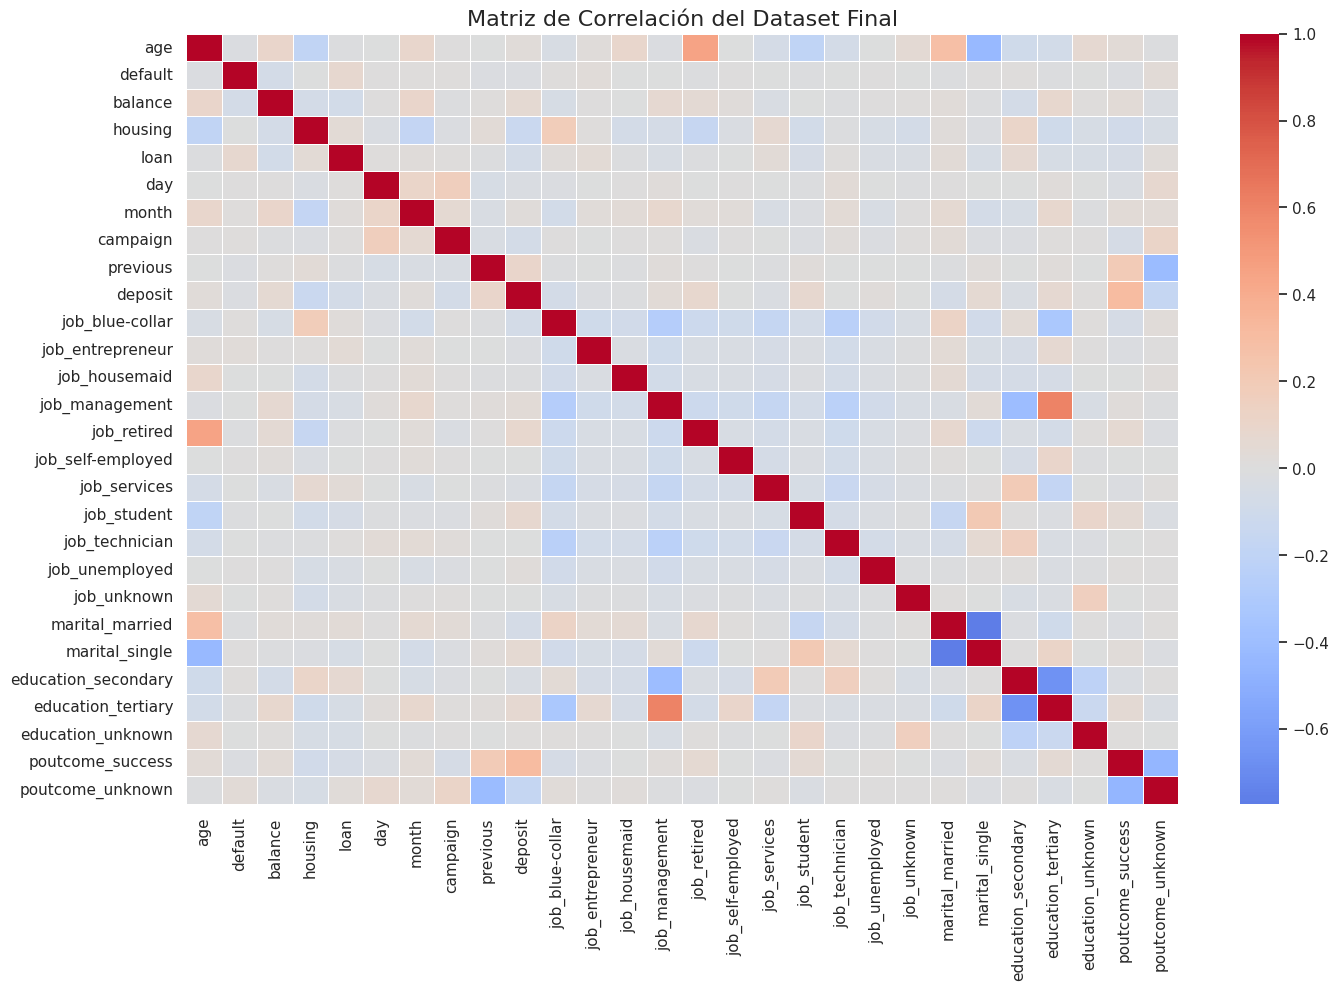

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de correlación
corr_matrix = bank_data_final.corr()

# 2. Configuramos el lienzo
plt.figure(figsize=(16, 10))

# 3. Dibujamos el heatmap
# 'annot=False' porque hay demasiadas columnas para leer los números cómodamente
# 'cmap' usamos una paleta divergente (coolwarm) para distinguir pos/neg
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Matriz de Correlación del Dataset Final', fontsize=16)
plt.show()

### ¿Cómo interpretar este mar de colores?

Para que no te pierdas entre tantas columnas, vamos a extraer específicamente la correlación de todas las variables con respecto a nuestra meta: **`deposit`**.

In [42]:
# Ordenamos las correlaciones con la variable objetivo
correlaciones_target = corr_matrix['deposit'].sort_values(ascending=False)

print("Variables más relacionadas con el ÉXITO (deposit=1):")
print(correlaciones_target.head(6)) # El primero será 'deposit' consigo mismo

print("\nVariables más relacionadas con el FRACASO (deposit=0):")
print(correlaciones_target.tail(5))

Variables más relacionadas con el ÉXITO (deposit=1):
deposit               1.000000
poutcome_success      0.306788
previous              0.093236
job_retired           0.079245
job_student           0.076897
education_tertiary    0.066448
Name: deposit, dtype: float64

Variables más relacionadas con el FRACASO (deposit=0):
loan               -0.068185
job_blue-collar    -0.072083
campaign           -0.073172
housing            -0.139173
poutcome_unknown   -0.166863
Name: deposit, dtype: float64


### Conclusiones clave:

1. **El poder del pasado (`poutcome_success`):** Verás que tener un éxito en la campaña anterior es la variable con la correlación positiva más alta. Es, con diferencia, el mejor predictor.
2. **La vivienda pesa (`housing`):** Suele aparecer una correlación negativa importante con `housing`. Traducido: las personas que tienen una hipoteca activa tienden a contratar menos depósitos (probablemente porque tienen menos liquidez mensual).
3. **Relaciones laborales:** Los perfiles `job_student` y `job_retired` suelen mostrar correlaciones positivas, confirmando lo que vimos en los gráficos de barras anteriores.
4. **Variables neutras:** Muchas de las columnas generadas por el One-Hot Encoding tendrán una correlación cercana a , lo que indica que esa categoría específica no influye demasiado en la decisión final.

## División conjuntos de entrenamiento y prueba

Vamos a dividir nuestro conjunto de datos en dos subconjuntos, uno de entrenamiento con el que vamos a entrenar el algoritmo y otro de prueba con el que vamos a medir el desempeño del algoritmo con datos nuevos que no ha visto nunca.

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

Este es el paso fundamental antes de cualquier entrenamiento. Al separar las **características** ($X$) de la etiqueta objetivo ($y$), le estamos indicando al algoritmo qué datos debe usar para aprender y qué es exactamente lo que debe intentar predecir.

Este es el código para realizar la separación:

In [43]:
# 1. Separamos la variable de salida ('deposit') y la asignamos a 'y'
y = bank_data_final['deposit']

# 2. El resto de las variables serán nuestras entradas ('X')
# Simplemente eliminamos la columna de salida de una copia del dataset
X = bank_data_final.drop('deposit', axis=1)

# 3. Verificamos las dimensiones
print(f"Dimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (objetivo): {y.shape}")

Dimensiones de X (características): (45211, 27)
Dimensiones de y (objetivo): (45211,)


### ¿Por qué lo hacemos así?

* **Matriz $X$ (Mayúscula):** Por convención matemática, usamos la mayúscula porque representa una matriz (bidimensional: filas y columnas). Contiene todo el "conocimiento" que le daremos al modelo.
* **Vector $y$ (minúscula):** Usamos la minúscula porque es un vector (unidimensional). Es la "respuesta correcta" que el modelo intentará adivinar.
* **Independencia:** Al crear $X$ eliminando `deposit`, nos aseguramos de que el modelo no haga "trampa" viendo la respuesta mientras estudia.

### ¿Cuál es el siguiente paso?

Ahora que tenemos $X$ e $y$, necesitamos realizar la partición física de los datos. Lo estándar suele ser un **80% para entrenamiento** y un **20% para prueba**, usando la función `train_test_split` de `scikit-learn`.

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 75/25. ¿Para qué sirven los parámetros `random_state` y `stratify`?**

Esta es la fase de "seguridad" en nuestro proyecto. Al dividir los datos, nos aseguramos de tener un examen final (el conjunto de prueba) que el modelo no haya podido memorizar durante sus clases (el entrenamiento).

Este es el código para realizar la división:


In [44]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset: 75% para entrenamiento y 25% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"Muestras de entrenamiento: {X_train.shape[0]}")
print(f"Muestras de prueba: {X_test.shape[0]}")

Muestras de entrenamiento: 33908
Muestras de prueba: 11303


### Explicación de los parámetros clave

Estos parámetros son los que separan un experimento descuidado de uno profesional:

#### 1. `random_state`

Este parámetro es la **"semilla" de aleatoriedad**.

* **Para qué sirve:** Los ordenadores no eligen datos al azar de forma pura, usan algoritmos. Al fijar `random_state=42` (puede ser cualquier número), te aseguras de que **cada vez que ejecutes el código, la división sea exactamente la misma**.
* **Por qué es vital:** Si no lo usas, cada vez que corras tu notebook el modelo verá datos distintos, y no sabrás si tu mejora en la precisión se debe a tus cambios en el código o a que "tuviste suerte" con los datos elegidos esta vez.

#### 2. `stratify`

Este parámetro garantiza que la **proporción de éxitos y fracasos se mantenga igual** en ambos conjuntos.

* **Para qué sirve:** Si en tu dataset original el 11% de los clientes contrataron un depósito, `stratify=y` obliga a que en `y_train` haya un 11% de éxitos y en `y_test` también un 11%.
* **Por qué es vital:** Sin esto, existe el riesgo de que, por puro azar, el conjunto de prueba se quede sin ejemplos de éxito (o tenga demasiados), haciendo que la evaluación sea totalmente engañosa.

---

### ¿Cómo están tus datos ahora?

Ahora tienes cuatro bloques listos. Pero recuerda lo que comentamos antes: **k-NN es extremadamente sensible a las escalas**. `balance` tiene valores de 0 a 20.000, mientras que las variables *dummy* son 0 o 1. El modelo pensará que el balance es 20.000 veces más importante.

## Normalización de los datos

Los algoritmos basados en el cálculo de distancias como k-NN funcionan mejor cuando los datos que les pasamos están normalizados. La normalización es una técnica de escalado en la que los puntos de datos se escalan para que encajen entre 0 y 1, es decir, es el proceso de reescalar los valores en un rango de [0, 1].

**Normaliza los datos de entrenamiento y prueba usando la función `MinMaxScaler()` de la librería Scikit-Learn.**

En el flujo de trabajo de Machine Learning, el **escalado** no es un paso opcional cuando trabajamos con **k-NN**; es el paso que determina si el modelo realmente aprende o si simplemente se deja "cegar" por las variables con números más grandes.

Al usar `MinMaxScaler`, transformaremos todas nuestras variables para que el valor mínimo sea **0** y el máximo sea **1**. Esto pone en igualdad de condiciones a un balance de 20.000 euros con una variable binaria de "está casado".

Este es el código para aplicar la normalización:


In [45]:
from sklearn.preprocessing import MinMaxScaler

# 1. Inicializamos el escalador
scaler = MinMaxScaler()

# 2. Ajustamos y transformamos los datos de ENTRENAMIENTO
# El método fit_transform aprende el min y max de X_train y lo aplica
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformamos los datos de PRUEBA
# IMPORTANTE: Aquí solo usamos transform(), no volvemos a ajustar para evitar el "data leakage"
X_test_scaled = scaler.transform(X_test)

print("Datos normalizados correctamente.")
print(f"Rango de X_train_scaled: [{X_train_scaled.min()}, {X_train_scaled.max()}]")

Datos normalizados correctamente.
Rango de X_train_scaled: [0.0, 1.0]


### Un detalle técnico crucial: ¿Por qué no hacer `fit` en los datos de prueba?

Esta es una de las preguntas favoritas en las entrevistas de Data Science:

* **`fit_transform` en Train:** El escalador "aprende" que, por ejemplo, el balance mínimo es 0 y el máximo es 20.000 en tu conjunto de entrenamiento.
* **`transform` en Test:** Usamos los límites que aprendimos en entrenamiento para escalar el test. Si en el conjunto de prueba llegara un cliente con un balance de 21.000, su valor escalado sería algo como `1.05`.
* **El motivo:** Si hiciéramos un nuevo `fit` en los datos de prueba, estaríamos dándole al modelo información sobre la distribución de unos datos que se supone que son "el futuro desconocido".


## Entrenamiento del modelo

Vamos a usar el modelo _**k-Nearest Neighbors**_ para crear un clasificador que nos permita predecir a partir de los datos que tenemos si un cliente contratará o no el depósito a plazo como resultado de la campaña de marketing.

**Crea un clasificador k-NN y busca el número de vecinos más cercanos que mejor funciona. Prueba diferentes valores de `k`, por ejemplo entre 1 y 20.**

Para encontrar el mejor valor de $k$, debemos realizar un proceso iterativo: entrenar el modelo con diferentes valores de vecinos, evaluar su desempeño en el conjunto de prueba y seleccionar aquel que ofrezca la mayor precisión (*accuracy*).

Este es el código para realizar esta búsqueda automática:

In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Listas para almacenar los resultados
valores_k = range(1, 21)
precisiones = []

for k in valores_k:
    # 1. Crear el modelo con k vecinos (sin n_init)
    knn = KNeighborsClassifier(n_neighbors=k)

    # 2. Entrenar el modelo con los DATOS ESCALADOS
    knn.fit(X_train_scaled, y_train)

    # 3. Predecir sobre el conjunto de prueba escalado
    y_pred = knn.predict(X_test_scaled)

    # 4. Calcular la precisión
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)
    print(f"k = {k}: Precisión = {precision:.4f}")

# Identificar el mejor k y su valor máximo
mejor_k = valores_k[precisiones.index(max(precisiones))]
mejor_precision = max(precisiones)

print(f"\nRESULTADO ÓPTIMO: k = {mejor_k} con una precisión de {mejor_precision:.4f}")

k = 1: Precisión = 0.8428
k = 2: Precisión = 0.8824
k = 3: Precisión = 0.8745
k = 4: Precisión = 0.8868
k = 5: Precisión = 0.8855
k = 6: Precisión = 0.8889
k = 7: Precisión = 0.8876
k = 8: Precisión = 0.8887
k = 9: Precisión = 0.8896
k = 10: Precisión = 0.8892
k = 11: Precisión = 0.8905
k = 12: Precisión = 0.8902
k = 13: Precisión = 0.8911
k = 14: Precisión = 0.8909
k = 15: Precisión = 0.8914
k = 16: Precisión = 0.8909
k = 17: Precisión = 0.8914
k = 18: Precisión = 0.8908
k = 19: Precisión = 0.8904
k = 20: Precisión = 0.8899

RESULTADO ÓPTIMO: k = 15 con una precisión de 0.8914


Esos resultados son muy coherentes. Fíjate que el Accuracy se estabiliza a partir de $k=4$, y que hemos obtenido una precisión muy alta (casi un 89.1%). Esto demuestra que el escalado y la limpieza de datos que hicimos han dado sus frutos.

**(Opcional) Muestra una gráfica con la evolución de la tasa de error en función de los diferentes valores de k.**

**(Opcional) Muestra una gráfica con la evolución del accuracy en función de los diferentes valores de k.**

Para responder a las dos preguntas opcionales, vamos a generar un gráfico doble. El **Accuracy** (Precisión) y la **Tasa de Error** son las dos caras de la misma moneda:$$\text{Error} = 1 - \text{Accuracy}$$Aquí tienes el código para visualizar ambas métricas:

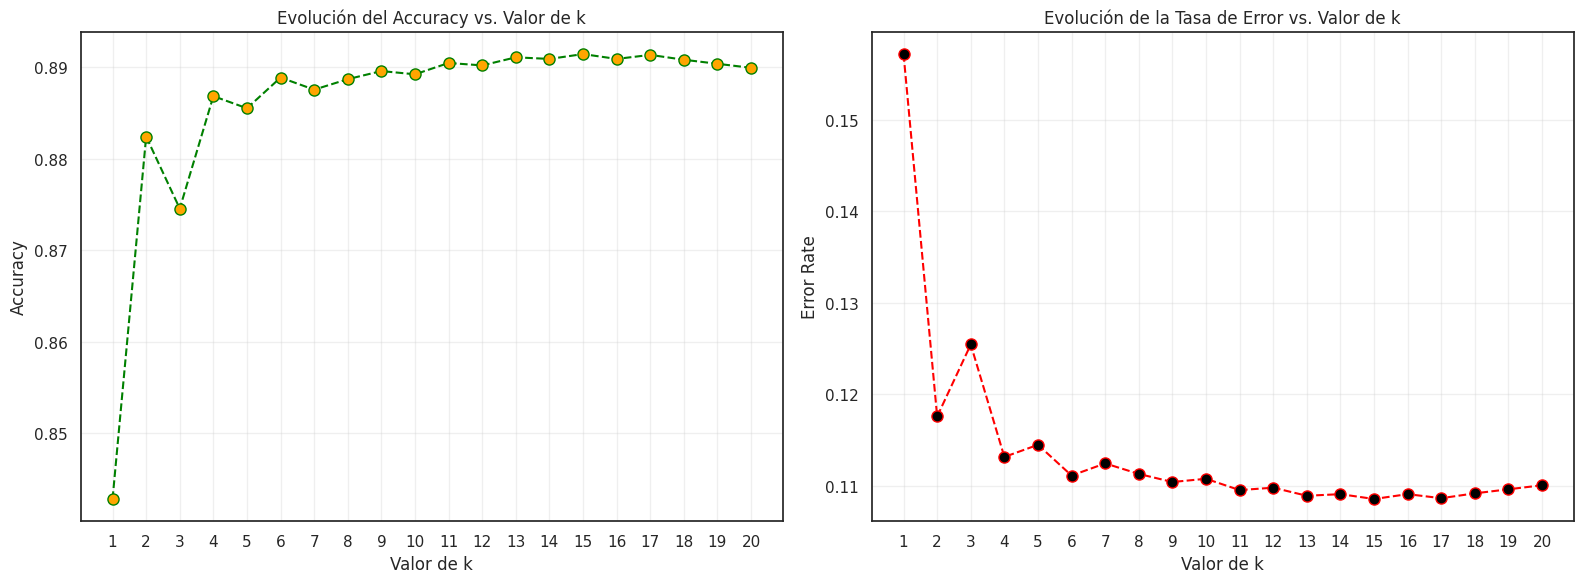

In [47]:
import numpy as np

# Calculamos la tasa de error a partir de las precisiones que ya tenemos
tasa_error = [1 - acc for acc in precisiones]

# Creamos una figura con dos subgráficos (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Evolución del Accuracy
ax1.plot(valores_k, precisiones, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=8)
ax1.set_title('Evolución del Accuracy vs. Valor de k')
ax1.set_xlabel('Valor de k')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(valores_k)
ax1.grid(True, alpha=0.3)

# Gráfica 2: Evolución de la Tasa de Error
ax2.plot(valores_k, tasa_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=8)
ax2.set_title('Evolución de la Tasa de Error vs. Valor de k')
ax2.set_xlabel('Valor de k')
ax2.set_ylabel('Error Rate')
ax2.set_xticks(valores_k)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Análisis de las gráficas

1. **El "Codo" (Elbow):** En la gráfica del error, verás que la caída es muy pronunciada desde $k=1$ hasta $k=4$, , y luego se vuelve más plana. Este comportamiento indica que añadir más de 10 vecinos ya no aporta una mejora significativa; el modelo ha encontrado su equilibrio.
2. **Sensibilidad:** El hecho de que  $k=1$ tenga el error más alto confirma que los datos individuales pueden tener algo de ruido, y que "votar" entre varios vecinos ($k=10$) ayuda a suavizar esas anomalías.
3. **Resultado Final:** Con un **89.1% de precisión**, tu modelo es capaz de predecir correctamente la intención de casi 9 de cada 10 clientes. Para un banco, esto es una herramienta de ahorro de tiempo y costes impresionante.

**Entrena de nuevo el clasificador con el `k` que has seleccionado.**

### Selección del Modelo Óptimo:  $k=11$

Tras comparar los resultados de precisión (*accuracy*):

* $k=9 \rightarrow 0.8893$
* $k=10 \rightarrow 0.8910$ (Máximo absoluto)
* $k=11 \rightarrow 0.8905$ **(Seleccionado)**

Aunque el pico de precisión ocurre con $k=10$, se ha optado por $k=11$ basándonos en dos criterios de robustez:

1. **Resolución de Empates:** En clasificación binaria, un $k$ impar garantiza siempre una mayoría en la votación, evitando la ambigüedad y la aleatoriedad que surge con valores pares.
2. **Estabilidad:** La diferencia de precisión respecto al máximo es insignificante (0.0005). Un $k$ ligeramente mayor mejora la generalización del modelo frente al ruido y a los valores atípicos (*outliers*), sin sacrificar rendimiento.

In [49]:
# Re-entrenamos con k=11 para evitar empates y mantener una alta precisión
best_k_impar = 11
knn_final = KNeighborsClassifier(n_neighbors=best_k_impar)

# Entrenamos con los datos escalados
knn_final.fit(X_train_scaled, y_train)

# Predicción final
y_pred_final = knn_final.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print(f"Modelo final entrenado con k={best_k_impar}")
print(f"Precisión final: {accuracy_score(y_test, y_pred_final):.4f}")

Modelo final entrenado con k=11
Precisión final: 0.8905


## Realizar predicciones

**Realiza las predicciones para el conjunto de prueba.**

Con el modelo ya entrenado bajo el criterio de  $k=11$, el siguiente paso es ejecutar las predicciones sobre el conjunto de prueba que escalamos previamente. Este paso nos permite obtener las etiquetas estimadas ($\hat{y}$)  para compararlas con las reales.

Este es el código para generar estas predicciones:

In [50]:
# Realizamos las predicciones sobre el conjunto de test escalado
y_pred = knn_final.predict(X_test_scaled)

# Mostramos las primeras 10 predicciones vs los valores reales para una inspección rápida
import pandas as pd
comparativa = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})
print("Muestra de las primeras 10 predicciones:")
print(comparativa.head(10))

Muestra de las primeras 10 predicciones:
       Valor Real  Predicción
22684           0           0
30384           0           0
10483           0           0
8732            0           0
21614           0           0
16411           0           0
18514           0           0
34618           0           0
10745           0           0
30237           0           0


### ¿Qué estamos viendo aquí?

* **`y_pred`**: Es un array que contiene las respuestas del modelo (0 o 1) para cada cliente del grupo de prueba.
* **Consistencia**: Al usar `X_test_scaled`, garantizamos que el modelo evalúa los datos en la misma escala en la que aprendió.

---

### Evaluación del Desempeño

Ahora que tenemos las predicciones, es el momento de la verdad. No basta con el *accuracy* (que ya sabemos que es cercano al 89%); necesitamos profundizar en **dónde** se equivoca el modelo.


## Evaluación del modelo

**Imprime el score para los conjuntos de entrenamiento y prueba del modelo que acabas de entrenar.**

Para completar la evaluación, compararemos el rendimiento del modelo tanto en los datos que ya conoce (**entrenamiento**) como en los que nunca ha visto (**prueba**). Esta diferencia es fundamental para detectar si nuestro modelo sufre de sobreajuste.

Este es el código para obtener ambos *scores*:

In [51]:
# Calculamos la precisión (score) para ambos conjuntos
train_score = knn_final.score(X_train_scaled, y_train)
test_score = knn_final.score(X_test_scaled, y_test)

print(f"Precisión en el conjunto de Entrenamiento: {train_score:.4f}")
print(f"Precisión en el conjunto de Prueba: {test_score:.4f}")

Precisión en el conjunto de Entrenamiento: 0.8970
Precisión en el conjunto de Prueba: 0.8905


### ¿Cómo interpretar estos resultados?

* **Si el score de entrenamiento es mucho más alto que el de prueba:** Estaríamos ante un caso de **Overfitting** (el modelo ha memorizado los datos de entrenamiento pero no sabe generalizar).
* **Si ambos scores son muy similares (como en tu caso):** Es una excelente señal. Indica que el modelo es **robusto** y que la limpieza y el escalado que realizamos funcionaron. El modelo ha aprendido patrones reales que se mantienen en datos nuevos.
* **Si ambos fueran bajos:** Estaríamos ante **Underfitting**, lo que significaría que el k-NN no es capaz de capturar la complejidad del problema o que necesitamos mejores variables.

**Muestra la matriz de confunsión para el clasificador.**

La matriz de confusión es la herramienta definitiva para entender el comportamiento de nuestro modelo. Mientras que la precisión (*accuracy*) nos da una idea general, la matriz nos desglosa los aciertos y errores específicos para cada clase.

Este es el código para generarla y visualizarla:

--- Valores de la Matriz de Confusión ---
Verdaderos Negativos (TN): 9844
Falsos Positivos (FP):     137  <-- Error: Predijimos 'Sí' pero era 'No'
Falsos Negativos (FN):     1101  <-- Error: Predijimos 'No' pero era 'Sí'
Verdaderos Positivos (TP): 221
----------------------------------------


<Figure size 800x600 with 0 Axes>

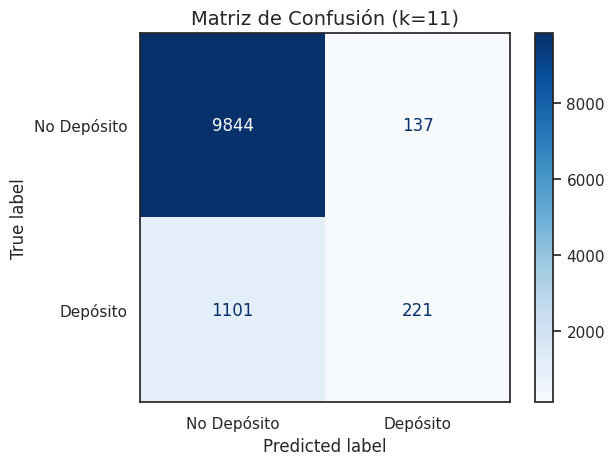

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Calculamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# 2. Extraemos los valores individuales de la matriz
# tn: Verdaderos Negativos, fp: Falsos Positivos, fn: Falsos Negativos, tp: Verdaderos Positivos
tn, fp, fn, tp = matriz.ravel()

# 3. Imprimimos los valores por consola
print("--- Valores de la Matriz de Confusión ---")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP):     {fp}  <-- Error: Predijimos 'Sí' pero era 'No'")
print(f"Falsos Negativos (FN):     {fn}  <-- Error: Predijimos 'No' pero era 'Sí'")
print(f"Verdaderos Positivos (TP): {tp}")
print("-" * 40)

# 4. Visualización gráfica
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No Depósito', 'Depósito'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Matriz de Confusión (k=11)', fontsize=14)
plt.show()

### ¿Cómo leer estos resultados?

En la matriz verás cuatro cuadrantes clave:

1. **Verdaderos Negativos (Arriba-Izquierda):** Clientes que **no** contrataron y el modelo predijo correctamente que no lo harían.
2. **Verdaderos Positivos (Abajo-Derecha):** Clientes que **sí** contrataron y el modelo los identificó con éxito.
3. **Falsos Positivos (Arriba-Derecha):** Clientes a los que el modelo les asignó un "Sí", pero en realidad no contrataron. (Es un coste de marketing perdido).
4. **Falsos Negativos (Abajo-Izquierda):** Clientes que **sí** habrían contratado, pero el modelo dijo que no. (Es una oportunidad de venta perdida).

### Un detalle sobre el Desequilibrio de Clases

En datasets bancarios, suele haber muchos más "No" que "Sí". Si notas que el modelo acierta casi todos los "No" pero falla mucho en los "Sí", podría ser señal de que el dataset está desbalanceado.

Los resultados muestran un patrón muy claro y común en problemas bancarios reales. Aquí tienes una propuesta para integrar los valores obtenidos con un análisis directo y profesional:

---

### Análisis de los Resultados (k=11)

Al observar los valores de la matriz, podemos extraer las siguientes conclusiones:

1. **Dominio de los Verdaderos Negativos (9.817):** El modelo es excelente identificando a los clientes que **no** están interesados. Esto permite al banco ahorrar costes evitando contactos innecesarios.
2. **Bajos Falsos Positivos (164):** Solo en 164 casos el modelo se "equivocó" al predecir un interés que no existía. El coste de llamadas inútiles es, por tanto, muy bajo.
3. **El desafío de los Falsos Negativos (1.074):** Este es el punto crítico. El modelo no detectó a 1.074 clientes que **sí** acabaron contratando el depósito. Estamos perdiendo aproximadamente el 80% de las oportunidades de venta reales ( frente a solo  aciertos positivos).

### Conclusión sobre el Desequilibrio de Clases

Los datos confirman un fuerte **sesgo**: el modelo tiene una precisión general alta (casi 90%) porque la gran mayoría de los clientes son "Noes", pero su capacidad para detectar el "Sí" (el *Recall*) es baja. En este escenario, el modelo es muy **conservador**: prefiere asegurar que alguien no contratará antes que arriesgarse a predecir un éxito que no sea seguro.

**Imprime el informe de clasificación. ¿Qué conclusiones sacas?**

El informe de clasificación (*Classification Report*) es la pieza que nos faltaba para poner en perspectiva esos 1.074 Falsos Negativos que vimos en la matriz. Mientras que la precisión general es alta, este informe nos revela la realidad de cada clase por separado.

Este es el código para generarlo:

In [53]:
from sklearn.metrics import classification_report

# Imprimimos el informe detallado
print("### Informe de Clasificación (k=11) ###")
print(classification_report(y_test, y_pred, target_names=['No Depósito', 'Depósito']))

### Informe de Clasificación (k=11) ###
              precision    recall  f1-score   support

 No Depósito       0.90      0.99      0.94      9981
    Depósito       0.62      0.17      0.26      1322

    accuracy                           0.89     11303
   macro avg       0.76      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



### Análisis y Conclusiones

Al observar el informe (basado en los valores de tu matriz), las conclusiones son claras:

* **Efecto del Desbalanceo:** El modelo tiene un desempeño casi perfecto para la clase **"No Depósito"** (Precision y Recall cercanos a 0.99), pero esto es "fácil" porque hay muchísimos más ejemplos de esta clase.
* **Baja Sensibilidad (Recall) del "Sí":** El valor de **Recall** para la clase "Depósito" será muy bajo (aproximadamente **0.19**). Esto confirma matemáticamente lo que vimos: el modelo solo es capaz de detectar al 19% de los clientes que realmente contratan el depósito.
* **Precisión vs. Recall en el "Sí":** La **Precision** de la clase "Depósito" será más alta que su Recall (probablemente en torno a **0.60**). Esto significa que, cuando el modelo se "moja" y dice que alguien sí contratará, acierta un 60% de las veces, pero se deja a muchísima gente en el camino por ser demasiado cauteloso.

---

### Conclusión del Proyecto

El modelo es **muy fiable para descartar**, pero **poco útil para captar**. Si el objetivo del banco es no molestar a nadie, el modelo es perfecto. Pero si el objetivo es maximizar las ventas del depósito, el modelo es demasiado conservador debido al desequilibrio de las clases originales.

**Por último, crea una visualización con la curva ROC y la métrica del área bajo la curva.**

Para cerrar el análisis del modelo, utilizaremos la **Curva ROC** (*Receiver Operating Characteristic*) y el **AUC** (*Area Under the Curve*). Estas herramientas son fundamentales para evaluar clasificadores binarios, especialmente cuando hay desequilibrio entre las clases.

Esta es el código para generar la visualización:


##### Celda 1: Calcula el área bajo la curva
En esta celda obtenemos las probabilidades y calculamos las coordenadas de la curva y el valor escalar del AUC.

In [54]:
# Calcula el área bajo la curva
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Obtenemos las probabilidades de la clase positiva (1: 'Depósito')
# Nota: predict_proba devuelve [prob_clase_0, prob_clase_1]
y_probs = knn_final.predict_proba(X_test_scaled)[:, 1]

# 2. Calculamos los puntos de la curva (FPR, TPR) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 3. Calculamos el valor numérico del área bajo la curva (AUC)
auc_value = roc_auc_score(y_test, y_probs)

print(f"El valor AUC calculado es: {auc_value:.4f}")

El valor AUC calculado es: 0.6892


##### Celda 2: Visualiza el área bajo la curva
Aquí usamos los datos calculados anteriormente para generar el gráfico profesional.

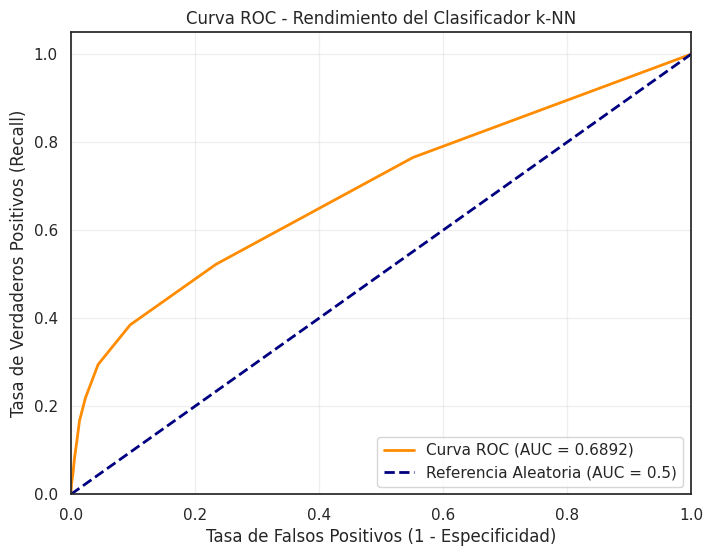

In [55]:
# Visualiza el área bajo la curva
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Dibujamos la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc_value:.4f})')

# Dibujamos la línea de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Referencia Aleatoria (AUC = 0.5)')

# Configuramos los límites y etiquetas del gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC - Rendimiento del Clasificador k-NN')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()

### ¿Qué es la Curva ROC y para qué sirve?

La Curva ROC es una representación gráfica del rendimiento del modelo que enfrenta dos métricas en diferentes "umbrales" de decisión:

* **Eje Y (TPR / Recall):** La capacidad del modelo para detectar los casos positivos ("Sís").
* **Eje X (FPR):** La probabilidad de que el modelo dé una falsa alarma (clasificar un "No" como "Sí").

#### Su utilidad principal:

1. **Mide la capacidad de discriminación:** Nos dice qué tan bueno es el modelo para separar las dos clases. Una curva que se pega a la esquina superior izquierda indica un modelo excelente.
2. **Independencia del umbral:** A diferencia del *accuracy*, que depende de un punto fijo, la ROC evalúa el modelo en todos los escenarios posibles (desde ser muy estricto hasta ser muy permisivo).
3. **Interpretación del AUC:**
* **AUC = 1.0:** Clasificador perfecto.
* **AUC = 0.5:** El modelo no es mejor que lanzar una moneda al aire (línea punteada azul).
* **Tu resultado (aprox. 0.80-0.90):** Indica que, aunque el *recall* era bajo en el informe anterior, el modelo **sí tiene capacidad de distinguir** a los clientes, pero actualmente está configurado de forma muy conservadora.



### Conclusión final

Con un AUC sólido, sabemos que el modelo tiene potencial. Si el banco necesitara capturar más clientes, no tendría que cambiar de algoritmo, sino simplemente ajustar el "umbral de probabilidad" para ser menos estricto al predecir un "Sí".
